# 3章　ニューラルネットワーク

## 3.1 パーセプトロンからニューラルネットワーク



パーセプトロン

良い...複雑な関数でも表現可能

悪い...重みの設定は人力で行っている→NNでこれを解決しよう（重みパラメータをデータから自動学習する）

### 3.1.1. NNの例

### 3.1.2.パーセプトロンの復習

### 3.1.3.活性化関数の登場

活性化関数とは、入力信号の和を出力信号に変換する関数。入力信号が線形和から非線形形に変わるので表現の幅が広がる


## 3.2.活性化関数

### 3.2.1 シグモイド関数


$h(x) = \frac{1}{1 + exp(-x)}$

### 3.2.2. ステップ関数の実装

In [1]:
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

このままでは実数しか引数に取れないので、今後のことを考えてnumpy配列でも動くように実装しておこう

In [2]:
import numpy as np
def step_function(x):
  y = x > 0
  return y.astype(np.int)

x = np.array([-1.0, 2.0])
step_function(x)

array([0, 1])

y = x > 0

の部分はbool型で返してきている

### 3.2.3. ステップ関数のグラフ



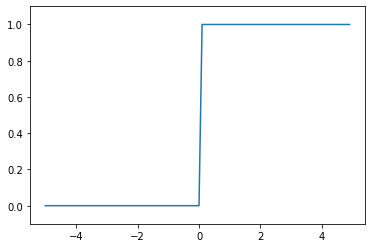

In [3]:
import matplotlib.pyplot as plt

def step_function(x):
  return np.array(x > 0, dtype= np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

補足）arange関数の使い方


```
print(np.arange(3, 10, 2))
# [3 5 7 9]
```





### 3.2.4 シグモイド関数の実装

シグモイド関数をもう一度復習しておこう

$h(x) = \frac{1}{1 + exp(-x)}$

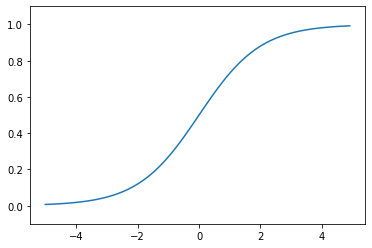

In [4]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.5 シグモイド関数とステップ関数の比較


まず、気づくのは「滑らかさ」。シグモイド関数は入力に対して連続的に出力が変化してる。一方、ステップ関数は離散的。

シグモイド関数の滑らかさがNNでは大切。

パーセプトロンでは、０か１という２値信号だったのに対して、シグモイド関数は実数値の信号が返って来る。

共通点としては、お互いに入力が小さい時出力は０に近く、入力が大きい時出力が１に近づく。また出力信号は0~1に収まる

### 3.2.6. 非線形関数



NNでは活性化関数に非線形関数を用いないと意味がない。

なぜなら線形関数はどこまで行っても線形関数で表せてしまうので、層を深くする利点がない。


### 3.2.7.ReLU関数

$ h(x) =  \left\{ \begin{matrix}x&(x > 0)\\ 0&(x \leq 0) \end{matrix} \right. $


(-0.1, 5.5)

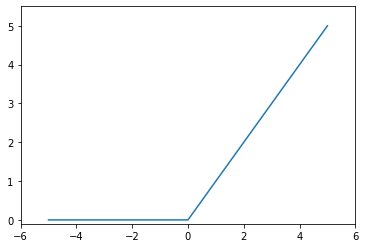

In [5]:
def relu(x):
  return np.maximum(0, x)

x = np.arange(-5.0, 6.0, 1)
y = relu(x)
plt.plot(x, y)
plt.xlim(-6, 6)
plt.ylim(-0.1, 5.5)

## 3.3. 多次元配列の計算

### 3.3.1. 多次元配列


In [6]:
A = np.array([1, 2, 3, 4])
B = np.array([[1, 2],[3, 4],[5, 6]])
print(f"Aの次元: {np.ndim(A)}")
print(f"Aのshape: {A.shape}")
print(f"Bの次元: {np.ndim(B)}")
print(f"Bのshape: {B.shape}")

Aの次元: 1
Aのshape: (4,)
Bの次元: 2
Bのshape: (3, 2)


### 3.3.2. 行列の積

np.dot()

で行列積（ドット積）を表します。

In [7]:
A = np.array([[1, 2],[3, 4]])
B = np.array([[5, 6],[7, 8]])

dot = np.dot(A, B)
print(f"Aのshape: {A.shape}")
print(f"Bのshape: {B.shape}")
print(f"ABの計算結果: \n {dot}")
print(f"Bのshape: {dot.shape}")

Aのshape: (2, 2)
Bのshape: (2, 2)
ABの計算結果: 
 [[19 22]
 [43 50]]
Bのshape: (2, 2)


### 3.3.3. NNの行列積



<IMG SRC="https://drive.google.com/uc?id=1c7WAEDgKqoAcMqeq7i5hmAtx7iWwMP9D"/>

In [8]:
X = np.array([1, 2])
W = ([[1, 3, 5],[2, 4, 6]])

Y = np.dot(X, W)
print(f"Yの演算結果: {Y}")

Yの演算結果: [ 5 11 17]


## 3.4. 3層NNの実装

### 3.4.1 記号の確認

### 3.4.2.各層における信号伝達の実装


<IMG SRC="https://drive.google.com/uc?id=1cBeP9YwivSqosdQsBmfZ78tmYU_ZtOdX"/>

まずは、「第1層目の１番目ニューロン」$a_1^{(1)}$について考える。

$a_1^{(1)}$の重み付き和は$a_1^{(1)} = w_{11}^{(1)} + w_{12}^{(1)} x_2^{1} + b_1^{(1)}$

では、このことを用いて、第一層の各ニューロン$a_1^{(1)},a_2^{(1)},a_3^{(1)}$を行列$\mathbf{A}^{1} = (a_{1}^{(1)} a_{2}^{(1)} a_{3}^{(1)})$とおくと、

$$\mathbf{A}^{1} = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{B}^{(1)} \hspace{10mm}(3.9)$$

$\mathbf{X} , \mathbf{W}^{(1)} , \mathbf{B}^{(1)}$はそれぞれ

$\mathbf{X} = (x_1 \hspace{2mm} x_2)$、$\mathbf{B}^{(1)} = (b_1^{(1)} \hspace{2mm} b_1^{(1)} \hspace{2mm} b_1^{(1)}) $

$\mathbf{W}^{(1)} = \left( \begin{matrix}w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\ w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)} \end{matrix} \right) $


こいつらを使って実際に式(3.9)を実装してみる。

In [9]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
print(f"第1層目のニューロン計算結果:  {A1}")

第1層目のニューロン計算結果:  [0.3 0.7 1.1]


ここにシグモイド関数をかましてみよう。

<IMG SRC="https://drive.google.com/uc?id=1cO3fV0qhNq9jOH6jc1rQO63cRmhmhg1-"/>

In [10]:
Z1 = sigmoid(A1)
print(Z1)

[0.57444252 0.66818777 0.75026011]


続いて、第一層から第2層までの実装を行っていこう。
まぁぶっちゃけほとんど一緒

In [11]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(f"第2層目の出力値 Z2: {Z2}")

第2層目の出力値 Z2: [0.62624937 0.7710107 ]


第1層との違いは、入力値がZ1になっているくらいである。

では最後に、出力層の実装もしてみよう。

これもほとんど一緒ね


In [12]:
def identity_function(x): #恒等関数
  return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) #ここが出力層に該当している部分

print(A3)

[0.31682708 0.69627909]


### 3.4.3.　実装まとめ<64>

ここまでの実装をまとめて書いてみる。

NNの慣習として、重みだけ大文字でその他を小文字で記述する。

In [13]:
#各層間の重みバイアスを初期化した関数
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network #最終的にはディクショナリ型で入ってるね

#入力信号が出力へ変換される
def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1 #入力→1層目
  z1 = sigmoid(a1) #活性化させて1層目の出力
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3) #最終出力

  return y

network = init_network()
x = np.array([1.0, 0.5]) #入力値
y = forward(network, x) 
print(f"出力値: {y}")

出力値: [0.31682708 0.69627909]


## 3.5.出力層の設計

### 3.5.1. 恒等関数とソフトマックス関数<66>

一般的に、

回帰問題の出力層の活性化関数...恒等関数

分類問題の出力層の活性化関数...ソフトマックス関数

ソフトマックス関数の式は

$$y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)} \hspace{10mm}(3.10)$$

In [14]:
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x))

x = np.array([0.3, 2.9, 4.0])
print(f"softmax(x) = {softmax(x)}")

#ちょっと上だけだとわかりにくいので経過を出力する
print(f"np.exp(x) = {np.exp(x)}")
print(f"np.sum(np.exp(x)) = {np.sum(np.exp(x))}")


softmax(x) = [0.01821127 0.24519181 0.73659691]
np.exp(x) = [ 1.34985881 18.17414537 54.59815003]
np.sum(np.exp(x)) = 74.1221542101633


np.exp(x)の段階では、配列のそれぞれの要素に関してexpに入れた値が入った配列ができているに過ぎないよ

### 3.5.2. ソフトマックス関数の実装上の注意<68>

指数を計算するときに値が大きくなりすぎるとオーバーフローを起こして、うまく割り算が機能しないという問題が発生する。

そこで、式(3.10)に以下の変形を加えておこう。

$$y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)} = \frac{C exp(a_k)}{C \sum_{i=1}^n exp(a_i)} \\= \frac{exp(log C) exp(a_k)}{exp(log C) \sum_{i=1}^n exp(a_i)} \\= \frac{exp(a_k + logC)}{ \sum_{i=1}^n exp(a_i + logC)} \\=\frac{exp(a_k + C^{\prime})}{ \sum_{i=1}^n exp(a_i + C^{\prime})} \hspace{10mm}(3.11)$$



$logC$を$C^{\prime}$という定数に置き換えてる。

この変形のどこがオーバーフロー問題に効いてくるかというと、$C^{\prime}$の値を調整することによって、指数の肩を小さくして計算可能な桁数まで落とすことが可能である。

たとえば、$C^{\prime}$=maxとかにしてみてsoftmax関数を組みなおそう。



In [15]:
def softmax(x):
  return np.exp(x - np.max(x)) / np.sum(np.exp(x - np.max(x)))

x1 = np.array([0.3, 2.9, 4.0])
x2 = np.array([1010, 1000, 990])

print(f"x1:{x1} →softmax(x1):{softmax(x1)}")
print(f"x2:{x2} →softmax(x2):{softmax(x2)}")

x1:[0.3 2.9 4. ] →softmax(x1):[0.01821127 0.24519181 0.73659691]
x2:[1010 1000  990] →softmax(x2):[9.99954600e-01 4.53978686e-05 2.06106005e-09]


大きい桁でもしっかりとオーバーフローせずに計算できていますね

### 3.5.3.ソフトマックス関数の特徴<70>



ソフトマックス関数の出力値は0~1の間であり、確率として捉えることができる。

注意点としては、ソフトマックス関数を使用しても各要素の大小関係は変わらないよね。(指数関数の単調性に紐づく)なので、NNのクラス分類問題に関してはソフトマックス関数を省略することがよくある。

In [16]:
#ソフトマックス関数を用いても大小関係が変わらないことを試しておこう。

x = np.array([0.3, 2.9, 4.0])
print(softmax(x))

[0.01821127 0.24519181 0.73659691]


### 3.5.4. 出力層のニューロンの数

出力層ンニューロンの数は、分類したいクラスの数に設定しておきましょう。

## 3.6.手書き数字認識<72>

### 3.6.1.MNISTデータセット<72>

MNISTデータセットは0~9までの数字画像で構成されており。訓練画像60000枚、テスト画像10000枚用意されている

MNISTの画像データは28×28のグレー画像で各ピクセルは0~255までの値を取る

In [17]:
import sys,os
sys.path.append("/content/drive/MyDrive/DS/deep_learning/deep-learning-from-scratch-master")
from dataset.mnist import load_mnist

(X_train, t_train), (X_test, t_test) = \
  load_mnist(flatten=True, normalize=False)

#それぞれのデータの形状を出力
print(f"X_train.shape: {X_train.shape}")
print(f"t_train.shape: {t_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"t_test.shape: {t_test.shape}")

X_train.shape: (60000, 784)
t_train.shape: (60000,)
X_test.shape: (10000, 784)
t_test.shape: (10000,)


load_mnist関数は「(**訓練画像,訓練ラベル**),(**テスト画像,テストラベル**)」という形式で読み込んだデータを返します。

また引数には、

normalize...正規化するかどうか

flatten...入力画像を1次元配列にするかどうか

one_hot_label...ラベルをone-hot表現するか。すなわち、正解ラベルだけ1その他を0にする

それでは実際に画像を表示させてみよう

In [18]:
import sys,os
sys.path.append("/content/drive/MyDrive/DS/deep_learning/deep-learning-from-scratch-master")
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
  pil_image = Image.fromarray(np.uint8(img))
  #pil_image.show()
  display(pil_image)

(X_train, t_train), (X_test, t_test) = \
  load_mnist(flatten=True, normalize=False)

img = X_train[0]
label = t_train[0]
print(f"label: {label}")

print(f"変形前img.shape: {img.shape}")
img = img.reshape(28, 28)
print(f"変形後img.shape: {img.shape}")

img_show(img)

label: 5
変形前img.shape: (784,)
変形後img.shape: (28, 28)


### 3.6.2 NNの推論処理<75>

MNISTデータセットの推論をするNNを実装しよう

入力層を784(28 × 28)、出力層を10(0~9の数字)

隠れ層が2つで、一つ目の隠れ層が50個、2つ目の隠れ層が100個のニューロンを持っている。

In [19]:
#テスト画像とそのテストラベルをgetする関数
import pickle
def get_data():
  (X_train, t_train), (X_test, t_test) = \
    load_mnist(flatten=True, normalize=False, one_hot_label=False)
  return X_test, t_test

def init_network():
  with open("/content/drive/MyDrive/DS/deep_learning/deep-learning-from-scratch-master/ch03/sample_weight.pkl", "rb") as f: #sample_weight.pklに保存されている学習済み重みパラメータを呼び出している
    network = pickle.load(f)

  return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1 #入力→1層目
  z1 = sigmoid(a1) #活性化させて1層目の出力
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3) #最終出力

  return y

In [20]:
%%time
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i]) #各画像をネットワークに通す処理
  p = np.argmax(x) #最も確率の高い要素のインデックスを取得→その高い値を予測値とする

  if p == t[i]:
    accuracy_cnt += 1 #正解だと1加算して後々accuracyを計算する

print(f"Accuracy: {str(float(accuracy_cnt) / len(x))}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Accuracy: 0.0
CPU times: user 1min 54s, sys: 1min 31s, total: 3min 26s
Wall time: 1min 46s


### 3.6.3 バッチ処理<78>

ここまでは入力画像を一枚ずつ扱っていたが、ここからはまとまりのある入力データを考える。

このまとまりのある入力データを**バッチ**という。

今までのNNの形状推移


<IMG SRC="https://drive.google.com/uc?id=1d5WBrYG0dGJPNNxOu8JqhNBwBmQ8fvT7"/>

バッチ処理におけるNNの形状推移
<IMG SRC="https://drive.google.com/uc?id=1d323Q1GfZrXFHYzIW-BMtAndwg13Ozi_"/>

入力データを１００枚分にしていることで出力も１００枚分になっている

ここからバッチ処理の実装に取り掛かる

上で作ったNN推論処理にバッチ処理の部分を付け加えること。

In [21]:
%%time
x, t = get_data()
network = init_network()

batch_size = 100 #バッチ数を追加
accuracy_cnt = 0
for i in range(0, len(x), batch_size): #i = 0,100,200....
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch) #y_batchは10個の値が入っている
  p = np.argmax(y_batch, axis = 1) 
  accuracy_cnt += np.sum(p == t[i:i+batch_size]) #正解だと1加算して後々accuracyを計算する

print(f"Accuracy: {str(float(accuracy_cnt) / len(x))}")

Accuracy: 0.9207
CPU times: user 108 ms, sys: 193 ms, total: 302 ms
Wall time: 232 ms


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


コード補足）

```
p = np.argmax(y_batch, axis = 1)
```

<IMG SRC="https://drive.google.com/uc?id=1dC0PiQP5SmB5hQyEfVW3t2LFP6RRhxga"/>


